In [2]:
import pandas as pd
import numpy as np
from matrixprofile import *

In [3]:
df = pd.DataFrame(pd.read_csv("./combined_activities_51319.csv"))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698812 entries, 0 to 2698811
Data columns (total 27 columns):
Unnamed: 0                       int64
userID                           int64
time                             object
subjectID                        object
id.x                             float64
type                             object
relatedID                        object
data                             object
new.category                     object
GoldLabel                        float64
id.y                             float64
links_project                    float64
links_workflow                   float64
metadata_workflow_version        float64
annotations_value_choiceINT      float64
gravityspy_id                    object
annotations_value_choice         object
metadata_finished_at             object
metadata_started_at              object
uniqueID                         object
gold_score                       float64
annotations_value_choice_gold    object
s

Find the negative feedback indexes

In [5]:
neg_index = df[df.gold_score == 0].index.values.tolist()

In [6]:
#classify = {"classify":1, "communal":2, "exploring":3, "learning":4, "personal":5, "socialize":6, "view discussions":7}

In [7]:
#df["new.category2"] = [classify[item] if item in df["new.category2"].values else None for item in df["new.category2"].values]

In [8]:
# only need userID, links_workflow, gold_score time, new.category2 , session
df_lite = df.iloc[:,[1,2,12,20,22,26]]

In [9]:
df_lite.rename(columns = {'new.category2':'category2'}, inplace = True)

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [10]:
df_lite.links_workflow[df_lite.links_workflow == 1610] = 1
df_lite.links_workflow[df_lite.links_workflow == 1934] = 2
df_lite.links_workflow[df_lite.links_workflow == 1935] = 3
df_lite.links_workflow[df_lite.links_workflow == 2360] = 4
df_lite.links_workflow[df_lite.links_workflow == 2117] = 5

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exe

In [11]:
'''
df_lite.category2[df_lite.category2 == 'classify'] = 10
df_lite.category2[df_lite.category2 == 'communal'] = 20
df_lite.category2[df_lite.category2 == 'exploring'] = 30
df_lite.category2[df_lite.category2 == 'learning'] = 40
df_lite.category2[df_lite.category2 == 'personal'] = 50
df_lite.category2[df_lite.category2 == 'socialize'] = 60
df_lite.category2[df_lite.category2 == 'view discussions'] = 70
'''

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [12]:
df_lite.gold_score.value_counts()

1.0    559865
0.0     32054
Name: gold_score, dtype: int64

In [13]:
df_lite.gold_score = df_lite.gold_score.fillna(0)

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df_lite.category2.value_counts()

10    2523660
70      65237
30      45947
40      34486
60      17205
20       8131
50       4146
Name: category2, dtype: int64

In [15]:
#max(set(list(df_lite.userID)), key = list(df_lite.userID).count)
len(list(df_lite.userID.unique()))

10733

Create a df for workflow 5

In [16]:
df5 = df_lite[(df_lite.links_workflow == 5)]

In [17]:
df5.reset_index()

,index,userID,time,links_workflow,gold_score,session,category2
0,22004,1057540,2017-02-24 11:16:48,5.0,0.0,11,10
1,22005,1057540,2017-02-24 11:17:32,5.0,0.0,11,10
2,22007,1057540,2017-02-24 11:19:13,5.0,0.0,11,10
3,22008,1057540,2017-02-24 11:22:18,5.0,0.0,11,10
4,22009,1057540,2017-02-24 11:22:52,5.0,0.0,11,10
...,...,...,...,...,...,...,...
114437,2693474,986,2017-09-20 12:58:23,5.0,0.0,84,10
114438,2693475,986,2017-09-20 12:58:41,5.0,0.0,84,10
114439,2693476,986,2017-09-20 12:58:53,5.0,0.0,84,10
114440,2693477,986,2017-09-20 12:59:03,5.0,0.0,84,10


In [18]:
df5.userID.unique()

array([1057540, 1191124, 1191730, 1202620, 1244306, 1374419, 1430195,
       1430492, 1443190, 1455469, 1455696, 1483245, 1502635, 1505977,
       1507994, 1507997, 1508485, 1513387, 1517545, 1517687, 1520048,
       1524438, 1525581, 1529419, 1530603, 1530621, 1530882, 1533058,
       1534622, 1534755, 1536599, 1542559, 1543664, 1548316, 1551029,
       1559443, 1559755, 1559856, 1563309, 1563323, 1565910, 1575381,
       1575450, 1598413, 1599151, 1614870, 1630952, 1632885, 1646393,
       1664875, 1677904, 1680775, 1689505,    1856,    2236,  315840,
        316120,  325635,    3307,    3427,    3462,  424439,    4261,
        450605,  501682,    5209,  767062,   95974,     986], dtype=int64)

In [19]:
df5['category2'].value_counts()

10    114439
30         3
Name: category2, dtype: int64

In [20]:
#df3['new.category2'][df3['new.category2'] == 'classify'] = 1
#df3['new.category2'][df3['new.category2'] == 'communal'] = 2
#df3['new.category2'][df3['new.category2'] == 'exploring'] = 3
#df3['new.category2'][df3['new.category2'] == 'learning'] = 4
#df3['new.category2'][df3['new.category2'] == 'personal'] = 5
#df3['new.category2'][df3['new.category2'] == 'socialize'] = 6
#df3['new.category2'][df3['new.category2'] == 'view discussions'] = 7
#df3['new.category2'] = df3['new.category2'].map({"classify":1, "communal":2, "exploring":3, "learning":4, "personal":5, "socialize":6, "view discussions":7})

In [21]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114442 entries, 22004 to 2693478
Data columns (total 6 columns):
userID            114442 non-null int64
time              114442 non-null object
links_workflow    114442 non-null float64
gold_score        114442 non-null float64
session           114442 non-null int64
category2         114442 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 6.1+ MB


In [22]:
#df3.userID = pd.to_numeric(df3.userID,downcast = 'integer')
df5['category2'] = pd.to_numeric(df5['category2'],downcast = 'integer')

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df5['userID'].unique()

array([1057540, 1191124, 1191730, 1202620, 1244306, 1374419, 1430195,
       1430492, 1443190, 1455469, 1455696, 1483245, 1502635, 1505977,
       1507994, 1507997, 1508485, 1513387, 1517545, 1517687, 1520048,
       1524438, 1525581, 1529419, 1530603, 1530621, 1530882, 1533058,
       1534622, 1534755, 1536599, 1542559, 1543664, 1548316, 1551029,
       1559443, 1559755, 1559856, 1563309, 1563323, 1565910, 1575381,
       1575450, 1598413, 1599151, 1614870, 1630952, 1632885, 1646393,
       1664875, 1677904, 1680775, 1689505,    1856,    2236,  315840,
        316120,  325635,    3307,    3427,    3462,  424439,    4261,
        450605,  501682,    5209,  767062,   95974,     986], dtype=int64)

In [24]:
df5['category2'].values[0]

10

In [25]:
#For lossless time series conversion

In [38]:
my_list = [0]
data1 = df5.category2.values.tolist()
for i in range(0,len(data1)):
    if data1[i] == 10:
        my_list.append(my_list[-1]+3)
    elif data1[i] == 20:
        my_list.append(my_list[-1]+2)
    elif data1[i] == 30:
        my_list.append(my_list[-1]+1)
    elif data1[i] == 40:
        my_list.append(my_list[-1]+0)
    elif data1[i] == 50:
        my_list.append(my_list[-1]-1)
    elif data1[i] == 60:
        my_list.append(my_list[-1]-2)
    elif data1[i] == 70:
        my_list.append(my_list[-1]-3)

In [27]:
#my_list = np.array(df5['category2'].values.tolist())

In [40]:
my_list1 = matrixProfile.to_np_array(my_list)

In [64]:
len(my_list1)

114443

In [44]:
#set(my_list1)

In [45]:
m = 10
pattern = my_list1

In [46]:
mp = matrixProfile.stomp(pattern,m)

In [47]:
np.unique(mp, return_counts = True)

(array([0.00000000e+00, 6.83677960e-04, 9.66866957e-04, 1.22701020e-03,
        1.32806897e-03, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        4.00000000e+00, 5.00000000e+00, 6.00000000e+00, 7.00000000e+00,
        8.00000000e+00, 9.00000000e+00, 1.00000000e+01, 1.10000000e+01,
        1.20000000e+01, 1.30000000e+01, 1.40000000e+01, 1.50000000e+01,
        1.60000000e+01, 1.70000000e+01, 1.80000000e+01, 1.90000000e+01,
        2.00000000e+01, 2.10000000e+01, 2.20000000e+01, 2.30000000e+01,
        2.40000000e+01, 2.50000000e+01, 2.60000000e+01, 2.70000000e+01,
        2.80000000e+01, 2.90000000e+01, 3.00000000e+01, 3.10000000e+01,
        3.20000000e+01, 3.30000000e+01, 3.40000000e+01, 3.50000000e+01,
        3.60000000e+01, 3.70000000e+01, 3.80000000e+01, 3.90000000e+01,
        4.00000000e+01, 1.09486000e+05, 1.09488000e+05, 1.09489000e+05,
        1.09490000e+05, 1.09491000e+05, 1.09492000e+05, 1.09493000e+05,
        1.09494000e+05, 1.11568000e+05, 1.11569000e+05, 1.115700

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 0, 'Sample')

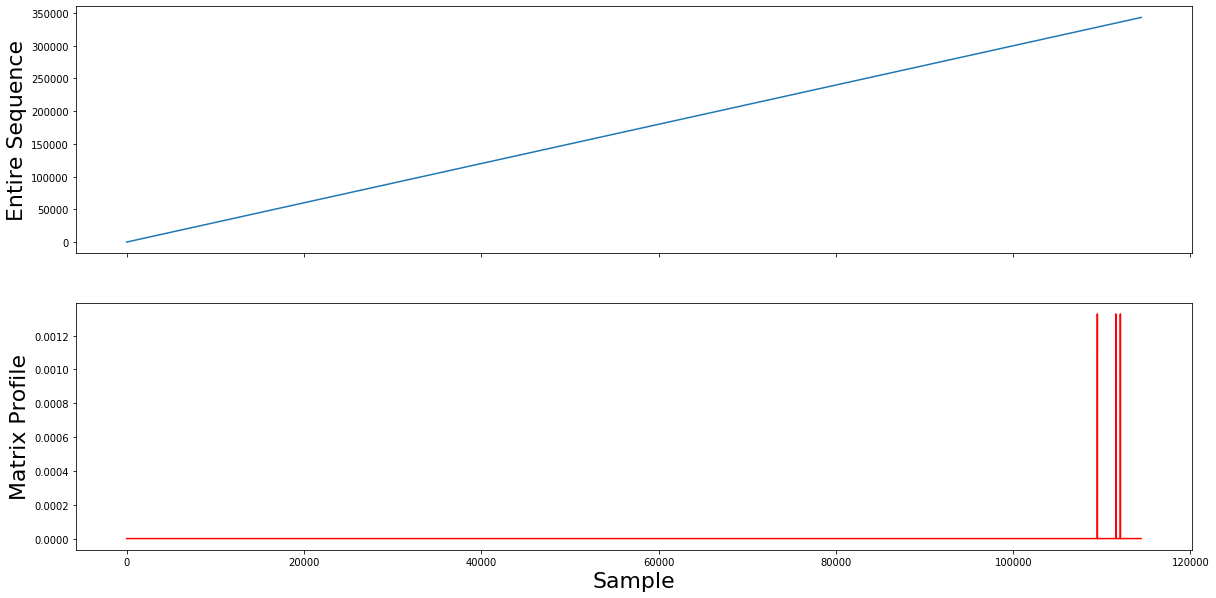

In [59]:
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

In [63]:
np.where([mp_adj == np.nanmax(mp_adj[100000:120000])])

(array([0, 0, 0], dtype=int64), array([109494, 111576, 112090], dtype=int64))

In [65]:
df5.iloc[[109494, 111576, 112090],:]

,userID,time,links_workflow,gold_score,session,category2
2459828,5209,2016-08-14 11:31:09,5.0,0.0,19,30
2476758,5209,2017-09-11 18:45:06,5.0,0.0,254,30
2477284,5209,2017-09-20 14:14:06,5.0,0.0,272,30


In [67]:
df5.iloc[109494:109494+10,:]

,userID,time,links_workflow,gold_score,session,category2
2459828,5209,2016-08-14 11:31:09,5.0,0.0,19,30
2459829,5209,2016-08-14 11:31:10,5.0,0.0,19,10
2459830,5209,2016-08-14 11:31:21,5.0,0.0,19,10
2459832,5209,2016-08-14 11:31:42,5.0,0.0,19,10
2459833,5209,2016-08-14 11:31:53,5.0,0.0,19,10
2459834,5209,2016-08-14 11:32:30,5.0,0.0,19,10
2459835,5209,2016-08-14 11:32:50,5.0,0.0,19,10
2459836,5209,2016-08-14 11:32:58,5.0,0.0,19,10
2459837,5209,2016-08-14 11:33:12,5.0,0.0,19,10
2459838,5209,2016-08-14 11:33:30,5.0,0.0,19,10


Create Matrixprofile for workflow 'n'

In [69]:
def create_matrixprofile(df,n):
    df_n = df[(df.links_workflow == n)]
    print(df_n.userID.unique())
    print(df_n['category2'].value_counts())
    print(df_n.info())
    my_list = [0]
    #data1 = df_n.category2.values.tolist()
    for i in range(0,len(df_n.category2.values)):
        if df_n.category2.values[i] == 10:
            my_list.append(my_list[-1]+3)
        elif df_n.category2.values[i] == 20:
            my_list.append(my_list[-1]+2)
        elif df_n.category2.values[i] == 30:
            my_list.append(my_list[-1]+1)
        elif df_n.category2.values[i] == 40:
            my_list.append(my_list[-1]+0)
        elif df_n.category2.values[i] == 50:
            my_list.append(my_list[-1]-1)
        elif df_n.category2.values[i] == 60:
            my_list.append(my_list[-1]-2)
        elif df_n.category2.values[i] == 70:
            my_list.append(my_list[-1]-3)
    print("Creating matrixprofile...")
    my_listn = matrixProfile.to_np_array(my_list)
    m = 10
    pattern = my_listn
    mp = matrixProfile.stomp(pattern,m)
    print("Done")
    return mp

In [70]:
mp4 = create_matrixprofile(df_lite,4)

[ 100423  103110 1036760 ...  997273  997501  999716]
10    898834
30        40
40         2
Name: category2, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 898876 entries, 305 to 2698811
Data columns (total 6 columns):
userID            898876 non-null int64
time              898876 non-null object
links_workflow    898876 non-null float64
gold_score        898876 non-null float64
session           898876 non-null int64
category2         898876 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 48.0+ MB
None
Creating matrixprofile...


KeyboardInterrupt: 

In [ ]:
mp_adj = np.append(mp4[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

In [ ]:
np.where([mp_adj == np.nanmax(mp_adj[100000:120000])])

Create Matrixprofile for workflow 3

In [71]:
mp3 = create_matrixprofile(df_lite,3)

[ 100423 1008979  102322 ...  997501  999701  999716]
10    675333
30         7
40         1
Name: category2, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 675341 entries, 271 to 2698731
Data columns (total 6 columns):
userID            675341 non-null int64
time              675341 non-null object
links_workflow    675341 non-null float64
gold_score        675341 non-null float64
session           675341 non-null int64
category2         675341 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 36.1+ MB
None
Creating matrixprofile...


KeyboardInterrupt: 

In [ ]:
mp_adj = np.append(mp3[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

Create Matrixprofile for workflow 2

In [ ]:
mp2 = create_matrixprofile(df_lite,2)

In [ ]:
mp_adj = np.append(mp2[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

Create matrixprofile for workflow 1

In [ ]:
mp1 = create_matrixprofile(df_lite,1)

In [ ]:
mp_adj = np.append(mp1[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)